In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("PastLoans.csv")

In [4]:
# encode sex column

df["sex"] = df["sex"].map({"M": 0, "F": 1})

In [5]:
# Encode employment column

df["employment"] = df["employment"].map(
    {"unemployed": 0, "student": 1, "employed": 2, "retired": 3}
)

In [6]:
df.head()

,sex,employment,married,income,digital1,digital2,digital3,default
0,0,0,0,0,0.749267,0.422656,0.738735,0
1,0,2,1,26108,0.697428,0.596361,0.733947,0
2,0,2,1,11810,0.000000,0.652496,0.000000,0
3,0,0,1,0,0.000000,0.000000,0.000000,0
4,1,3,1,6310,0.000000,0.041123,0.203202,0


In [8]:
df.describe()

,sex,employment,married,income,digital1,digital2,digital3,default
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.426690,1.668010,0.60822,18646.253910,0.417739,0.415741,0.414914,0.099470
std,0.494599,0.859884,0.48815,48178.198971,0.325269,0.325093,0.325064,0.299294
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.00000,5385.000000,0.064623,0.062594,0.060467,0.000000
50%,0.000000,2.000000,1.00000,9370.000000,0.448209,0.444645,0.440936,0.000000
75%,1.000000,2.000000,1.00000,17474.250000,0.696019,0.694762,0.692441,0.000000
max,1.000000,3.000000,1.00000,1000000.000000,0.999975,0.999986,0.999965,1.000000


In [9]:
df["default"].value_counts()

default
0    90053
1     9947
Name: count, dtype: int64

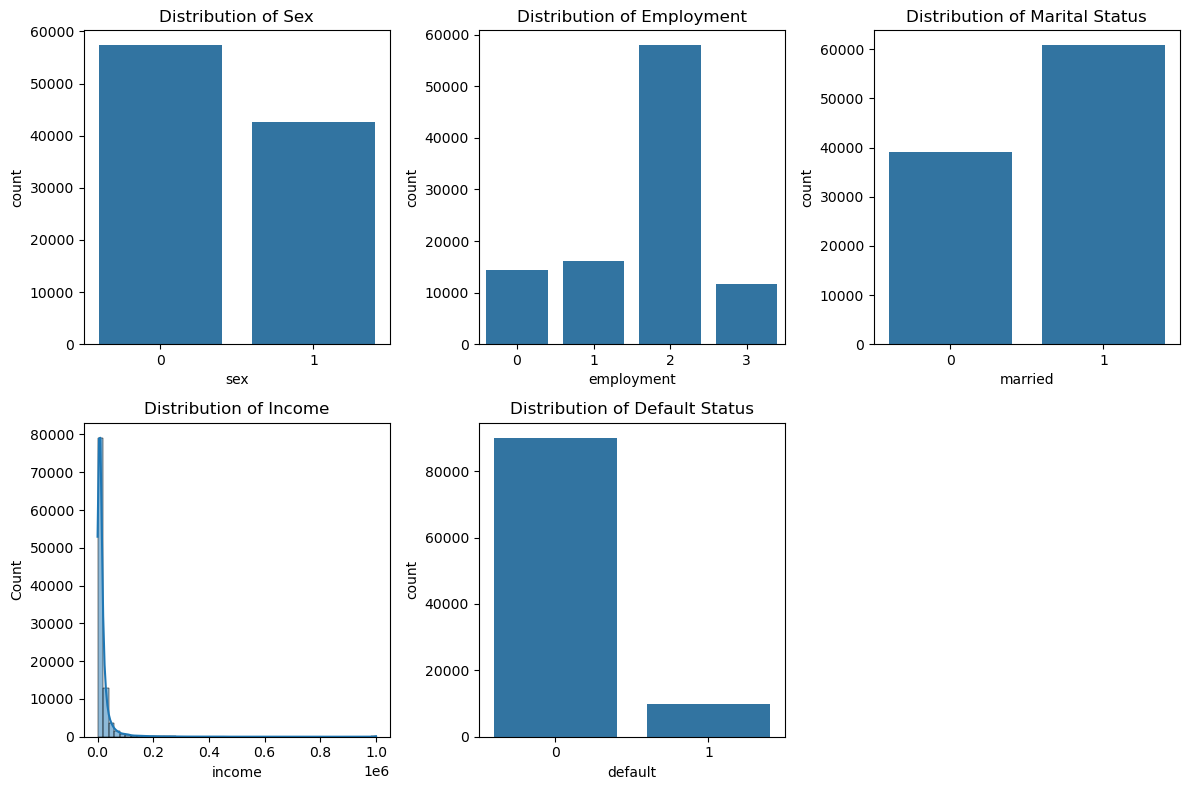

In [8]:
# Set up the plotting environment
plt.figure(figsize=(12, 8))

# Plot the distribution of sex
plt.subplot(2, 3, 1)
sns.countplot(x="sex", data=df)
plt.title("Distribution of Sex")

# Plot the distribution of employment
plt.subplot(2, 3, 2)
sns.countplot(x="employment", data=df)
plt.title("Distribution of Employment")

# Plot the distribution of marital status
plt.subplot(2, 3, 3)
sns.countplot(x="married", data=df)
plt.title("Distribution of Marital Status")

# Plot the distribution of income
plt.subplot(2, 3, 4)
sns.histplot(df["income"], bins=50, kde=True)
plt.title("Distribution of Income")

# Plot the distribution of default status
plt.subplot(2, 3, 5)
sns.countplot(x="default", data=df)
plt.title("Distribution of Default Status")

plt.tight_layout()
plt.show()


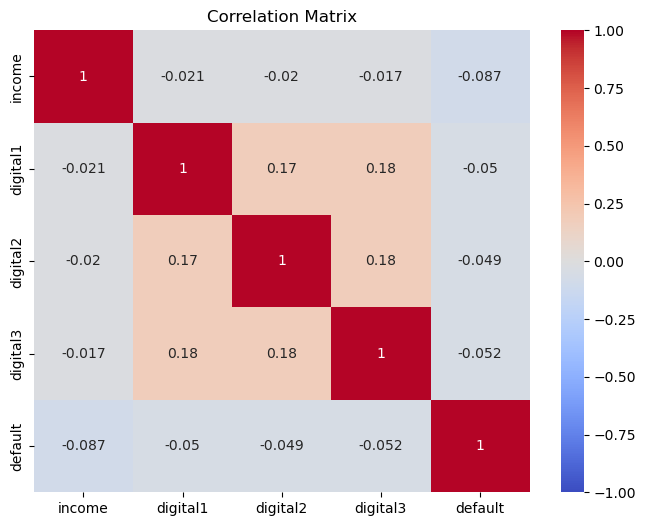

In [9]:
# Correlation matrix
corr_matrix = df[["income", "digital1", "digital2", "digital3", "default"]].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


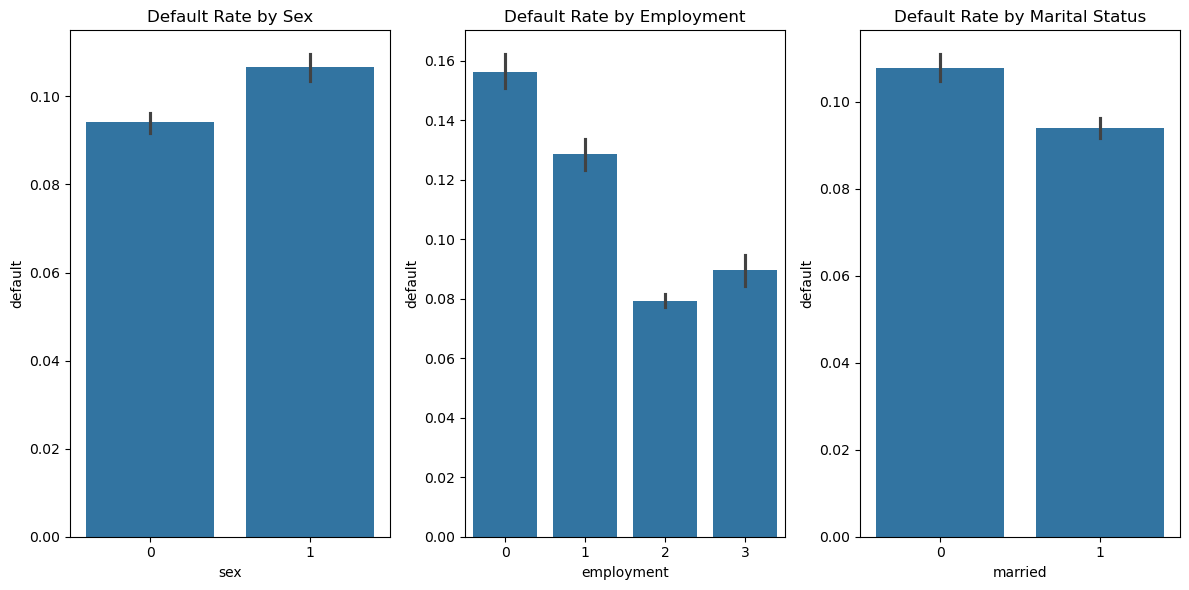

In [10]:
# Plot the default rate by sex
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.barplot(x="sex", y="default", data=df)
plt.title("Default Rate by Sex")

# Plot the default rate by employment
plt.subplot(1, 3, 2)
sns.barplot(x="employment", y="default", data=df)
plt.title("Default Rate by Employment")

# Plot the default rate by marital status
plt.subplot(1, 3, 3)
sns.barplot(x="married", y="default", data=df)
plt.title("Default Rate by Marital Status")

plt.tight_layout()
plt.show()


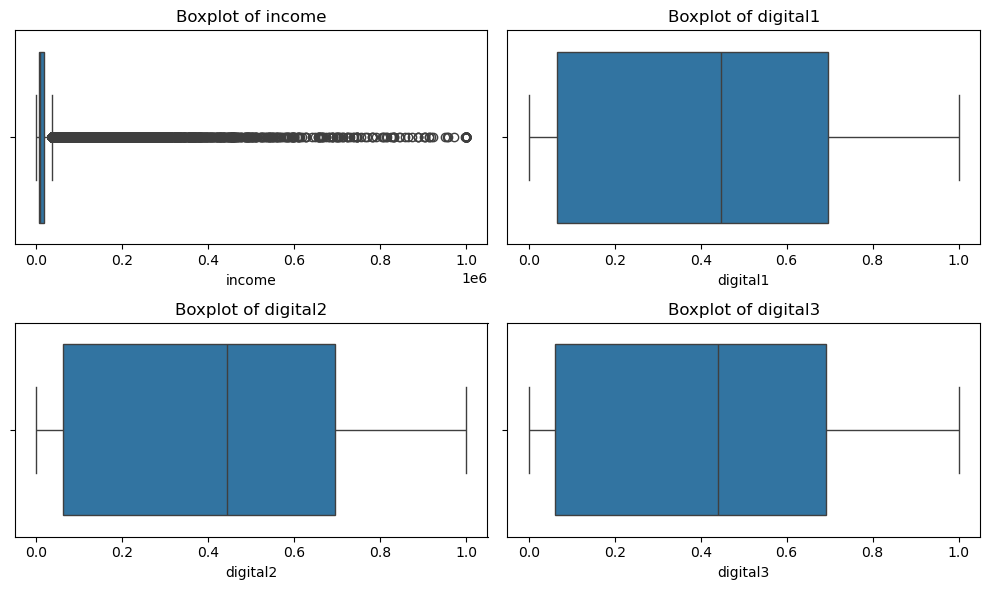

In [11]:
# Set up the plotting environment
plt.figure(figsize=(10, 6))

# Plot boxplots for numeric features
numeric_columns = ["income", "digital1", "digital2", "digital3"]

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()


In [12]:
# Function to detect outliers based on IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Number of outliers in {column}: {len(outliers)}")
    return outliers


# Detect outliers in income
outliers_income = detect_outliers_iqr(df, "income")

# Detect outliers in digital footprints
outliers_digital1 = detect_outliers_iqr(df, "digital1")
outliers_digital2 = detect_outliers_iqr(df, "digital2")
outliers_digital3 = detect_outliers_iqr(df, "digital3")


Number of outliers in income: 9610
Number of outliers in digital1: 0
Number of outliers in digital2: 0
Number of outliers in digital3: 0


In [13]:
# Count the number of outliers in income that are fraud (default = 1)
fraud_outliers_income = outliers_income[outliers_income["default"] == 1]
num_fraud_outliers_income = len(fraud_outliers_income)

print(f"Number of income outliers that are fraud: {num_fraud_outliers_income}")

Number of income outliers that are fraud: 65


In [14]:
# Calculate the percentage of defaults in the entire dataframe
total_defaults = df["default"].sum()
total_entries = len(df)
percentage_defaults_df = (total_defaults / total_entries) * 100

# Calculate the percentage of defaults in the income outliers dataframe
total_defaults_outliers = outliers_income["default"].sum()
total_entries_outliers = len(outliers_income)
percentage_defaults_outliers = (total_defaults_outliers / total_entries_outliers) * 100

print(f"Percentage of defaults in the entire dataframe: {percentage_defaults_df:.2f}%")
print(
    f"Percentage of defaults in the income outliers: {percentage_defaults_outliers:.2f}%"
)

Percentage of defaults in the entire dataframe: 9.95%
Percentage of defaults in the income outliers: 0.68%


In [18]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    balanced_accuracy_score,
    roc_curve,
    auc,
)

In [8]:
X = df.drop(["default", "digital1", "digital2"], axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Baseline

Accuracy: 0.5904333333333334
Balanced Accuracy: 0.6590195086458546
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.57      0.72     27016
           1       0.16      0.74      0.27      2984

    accuracy                           0.59     30000
   macro avg       0.56      0.66      0.49     30000
weighted avg       0.87      0.59      0.67     30000



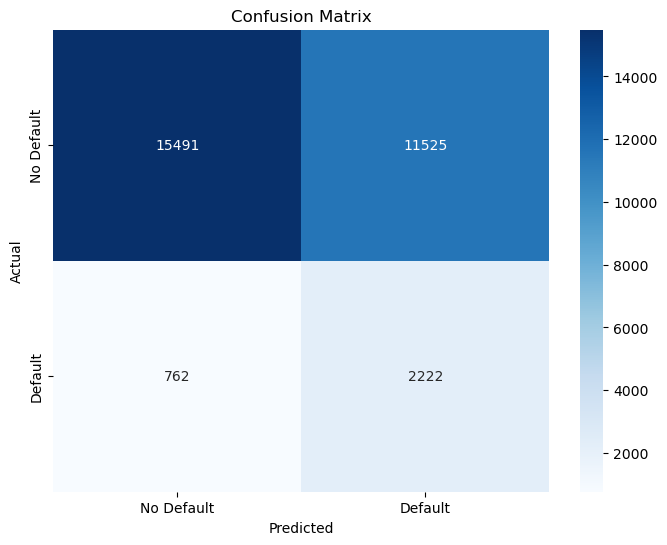

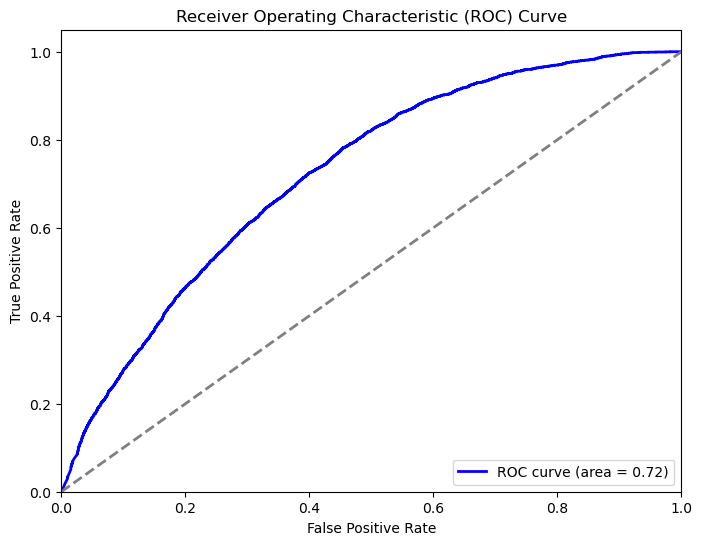

In [14]:
from sklearn.linear_model import LogisticRegression

# Initialize the KNN classifier
lr = LogisticRegression(max_iter=1000, class_weight="balanced")

# Fit the model
lr.fit(X_train, y_train)

# Predict the test set
y_pred = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Balanced Accuracy: {balanced_acc}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

       sex  employment  married  income  digital3  true_label  predicted_label
46838    0           2        0    5177  0.694658           0                1
72124    0           0        1   10024  0.000000           0                1
96061    0           2        0    7384  0.000000           0                1
87875    0           2        1    6492  0.000000           0                1
85677    0           2        1    7048  0.534399           0                1
...    ...         ...      ...     ...       ...         ...              ...
26319    0           3        0    4552  0.217436           0                1
57149    1           0        1       0  0.000000           0                1
12663    1           3        1    3815  0.000000           0                1
78513    1           1        0    5405  0.774827           0                1
95374    1           0        1    9382  0.227856           0                1

[12287 rows x 7 columns]


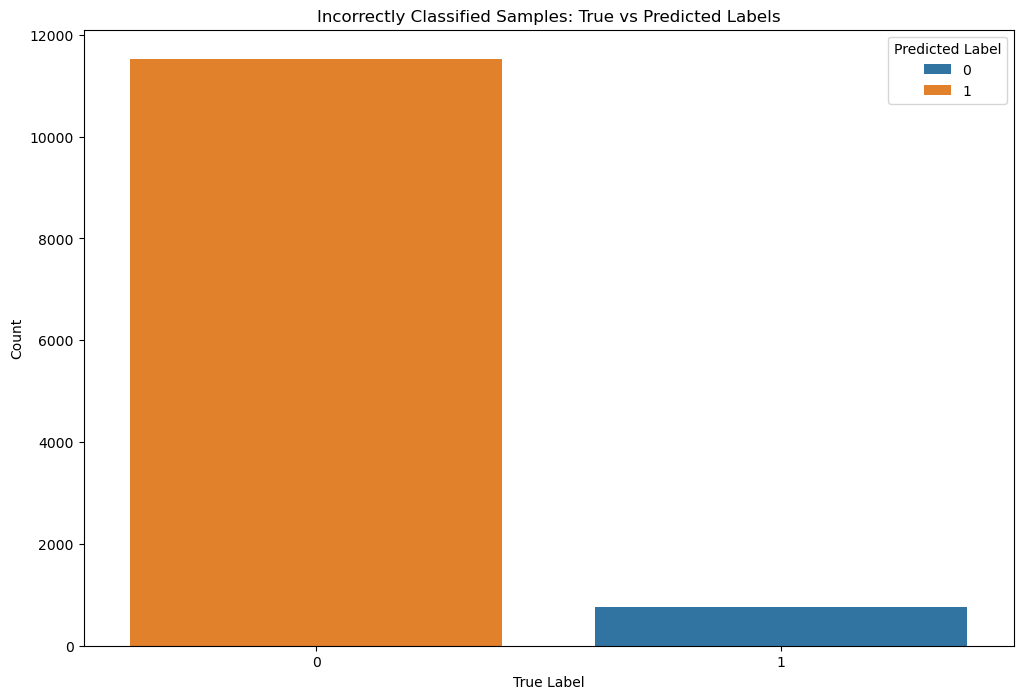

In [15]:
# Get the boolean mask of incorrect classifications
incorrect_mask = y_test != y_pred

# Get the indices of the incorrectly classified samples (based on position, not index)
incorrect_indices = X_test.index[incorrect_mask]

# Extract the incorrectly classified samples
incorrect_samples = X_test.loc[incorrect_indices]

# Add the true labels and predicted labels to the dataframe
incorrect_samples["true_label"] = y_test.loc[incorrect_indices]
incorrect_samples["predicted_label"] = y_pred[
    incorrect_mask
]  # Use the boolean mask here

# Display the incorrectly classified samples
print(incorrect_samples)

# Visualize the incorrectly classified samples
plt.figure(figsize=(12, 8))

# Plot the distribution of true vs predicted labels for incorrectly classified samples
sns.countplot(x="true_label", hue="predicted_label", data=incorrect_samples)
plt.title("Incorrectly Classified Samples: True vs Predicted Labels")
plt.xlabel("True Label")
plt.ylabel("Count")
plt.legend(title="Predicted Label")
plt.show()


In [32]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, balanced_accuracy_score


def objective(trial):
    # Define the search space
    C = trial.suggest_loguniform("C", 1e-5, 1e5)
    class_weight = "balanced"
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    fit_intercept = trial.suggest_categorical("fit_intercept", [True, False])
    solver = "liblinear" if penalty != "elasticnet" else "saga"
    n_jobs = -1

    # Initialize the model
    lr = LogisticRegression(
        penalty=penalty,
        C=C,
        class_weight=class_weight,
        max_iter=1000,
        fit_intercept=fit_intercept,
        solver=solver,
        n_jobs=n_jobs,
    )

    # Use cross-validation to evaluate the model performance
    scorer = make_scorer(balanced_accuracy_score)
    scores = cross_val_score(lr, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1)

    # Return the mean balanced accuracy score across the folds
    return scores.mean()


In [29]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params_lr = study.best_params
print(f"Best Parameters: {best_params_lr}")

[I 2024-10-15 17:18:17,650] A new study created in memory with name: no-name-3b0036f7-1874-4f0c-a127-1fd7bcfc0fed
[I 2024-10-15 17:18:24,897] Trial 0 finished with value: 0.598101184800825 and parameters: {'C': 100.5102748184978, 'fit_intercept': False, 'l1_ratio': 0.15279418273401235}. Best is trial 0 with value: 0.598101184800825.
[I 2024-10-15 17:18:31,462] Trial 1 finished with value: 0.5979511396682018 and parameters: {'C': 2.473096313476721e-05, 'fit_intercept': False, 'l1_ratio': 0.03775352422661893}. Best is trial 0 with value: 0.598101184800825.
[I 2024-10-15 17:18:39,177] Trial 2 finished with value: 0.5981947149182175 and parameters: {'C': 1.7850119692213844, 'fit_intercept': True, 'l1_ratio': 0.8442633761921929}. Best is trial 2 with value: 0.5981947149182175.
[I 2024-10-15 17:18:47,086] Trial 3 finished with value: 0.5981947149182175 and parameters: {'C': 0.008471177263748266, 'fit_intercept': True, 'l1_ratio': 0.6419719259663835}. Best is trial 2 with value: 0.59819471491

KeyboardInterrupt: 

Accuracy: 0.8574
Balanced Accuracy: 0.5467022421823707
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92     27016
           1       0.21      0.16      0.18      2984

    accuracy                           0.86     30000
   macro avg       0.56      0.55      0.55     30000
weighted avg       0.84      0.86      0.85     30000



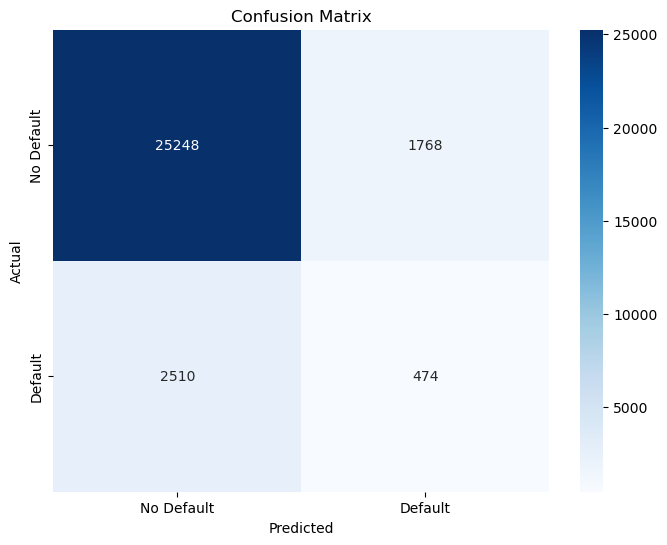

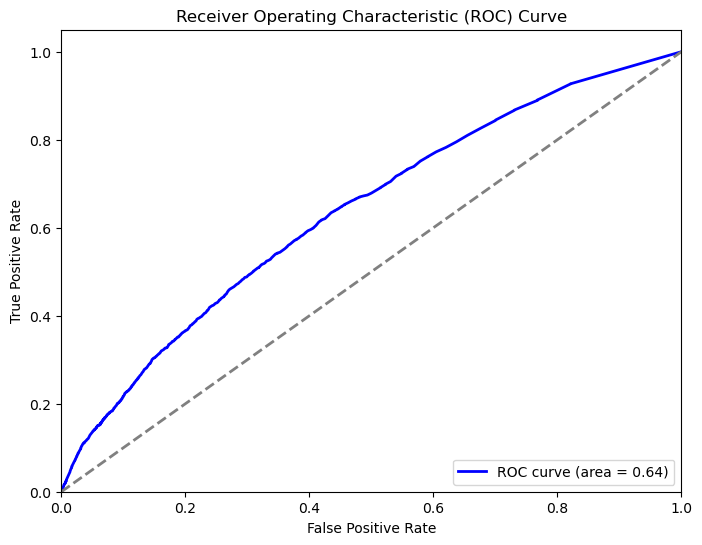

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, class_weight="balanced", random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

balanced_acc_rf = balanced_accuracy_score(y_test, y_pred_rf)
print(f"Balanced Accuracy: {balanced_acc_rf}")

print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_rf,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

y_prob_rf = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(
    fpr_rf, tpr_rf, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_rf:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [7]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
X_train.columns

Index(['sex', 'employment', 'married', 'income', 'digital3'], dtype='object')

In [18]:
categorical_features = ["sex", "employment", "married"]

In [19]:
import catboost as cb

cb_model = cb.CatBoostClassifier(
    iterations=10000,
    learning_rate=0.01,
    depth=6,
    boosting_type="Plain",
    cat_features=categorical_features,
    auto_class_weights="Balanced",
    eval_metric="AUC",
    verbose=100,
)

In [20]:
cb_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)

0:	test: 0.7123562	best: 0.7123562 (0)	total: 198ms	remaining: 32m 57s
100:	test: 0.7273705	best: 0.7274023 (99)	total: 4.37s	remaining: 7m 8s
200:	test: 0.7303250	best: 0.7303250 (200)	total: 8.98s	remaining: 7m 17s
300:	test: 0.7330845	best: 0.7330845 (299)	total: 12.9s	remaining: 6m 56s
400:	test: 0.7346866	best: 0.7346877 (398)	total: 16.9s	remaining: 6m 43s
500:	test: 0.7355427	best: 0.7355452 (499)	total: 20.7s	remaining: 6m 32s
600:	test: 0.7359458	best: 0.7359458 (600)	total: 24.4s	remaining: 6m 21s
700:	test: 0.7362903	best: 0.7362903 (700)	total: 28.1s	remaining: 6m 12s
800:	test: 0.7365448	best: 0.7365534 (795)	total: 31.8s	remaining: 6m 4s
900:	test: 0.7367570	best: 0.7367570 (900)	total: 35.3s	remaining: 5m 56s
1000:	test: 0.7368345	best: 0.7368397 (995)	total: 39.4s	remaining: 5m 54s
1100:	test: 0.7370310	best: 0.7370314 (1098)	total: 45.7s	remaining: 6m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.7370902637
bestIteration = 1131

Shrink model to

Accuracy: 0.5964
Balanced Accuracy: 0.6752999513345681
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     27016
           1       0.17      0.77      0.28      2984

    accuracy                           0.60     30000
   macro avg       0.56      0.68      0.50     30000
weighted avg       0.88      0.60      0.68     30000



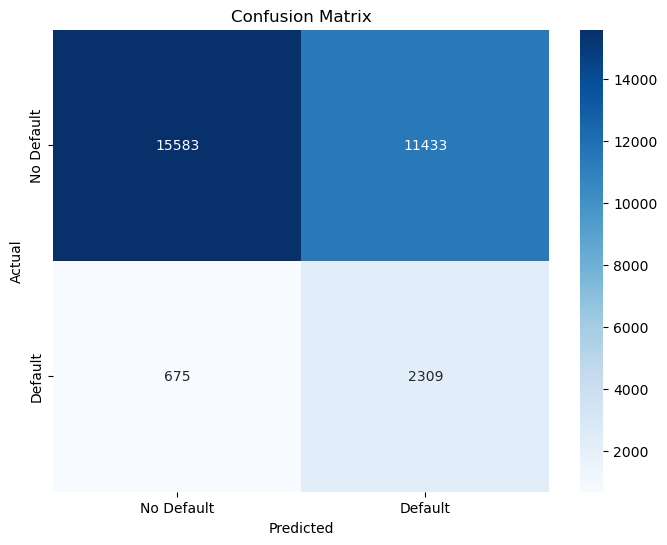

In [22]:
# Predict the test set
y_pred_cb = cb_model.predict(X_test)

# Calculate accuracy
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(f"Accuracy: {accuracy_cb}")

# Balanced accuracy
balanced_acc_cb = balanced_accuracy_score(y_test, y_pred_cb)

print(f"Balanced Accuracy: {balanced_acc_cb}")

# Classification report
print("Classification Report:")

print(classification_report(y_test, y_pred_cb))

# Confusion matrix
conf_matrix_cb = confusion_matrix(y_test, y_pred_cb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_cb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [15]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score

# Convert the dataset into XGBoost's DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for the XGBoost model
params = {
    "objective": "binary:logistic",
    "learning_rate": 0.01,
    "max_depth": 6,
    "scale_pos_weight": y_train.value_counts()[0] / y_train.value_counts()[1],
    "random_state": 42,
    "eval_metric": "auc",
}

# List of evaluation sets to monitor during training
evals = [(dtrain, "train"), (dtest, "validation")]

# Train the model with early stopping
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=100,
    evals_result=evals_result,
)

# Access the AUC scores during training
print("AUC during training:", evals_result["validation"]["auc"])


[0]	train-auc:0.73581	validation-auc:0.72466
[100]	train-auc:0.74618	validation-auc:0.73328
[200]	train-auc:0.74955	validation-auc:0.73434
[300]	train-auc:0.75307	validation-auc:0.73478
[336]	train-auc:0.75403	validation-auc:0.73457
AUC during training: [0.724660185484364, 0.7247435562959017, 0.7247141513697374, 0.7247597566053599, 0.7249483674057514, 0.7256095968053089, 0.7257550584659989, 0.7266014812193509, 0.7264901940246312, 0.7272501510374946, 0.7275698714633211, 0.7284219692867934, 0.7286792081209348, 0.7287314931931906, 0.7289971298906576, 0.7290838933397427, 0.7291519941811863, 0.7292986280694749, 0.7294191380284228, 0.7298497362996489, 0.7297079463783154, 0.7296922174408016, 0.7297101419792144, 0.7299021764284653, 0.7299778936481688, 0.7301795478064433, 0.7301172832939432, 0.7304256163659545, 0.7304769835033712, 0.7302202098389119, 0.7305136636833619, 0.7306326478857529, 0.7308461607697871, 0.7307973241554404, 0.7308513458611757, 0.7308688052299065, 0.7309097401619217, 0.7308

Accuracy: 0.6052333333333333
Balanced Accuracy: 0.6754347637106717
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     27016
           1       0.17      0.76      0.28      2984

    accuracy                           0.61     30000
   macro avg       0.56      0.68      0.50     30000
weighted avg       0.88      0.61      0.68     30000



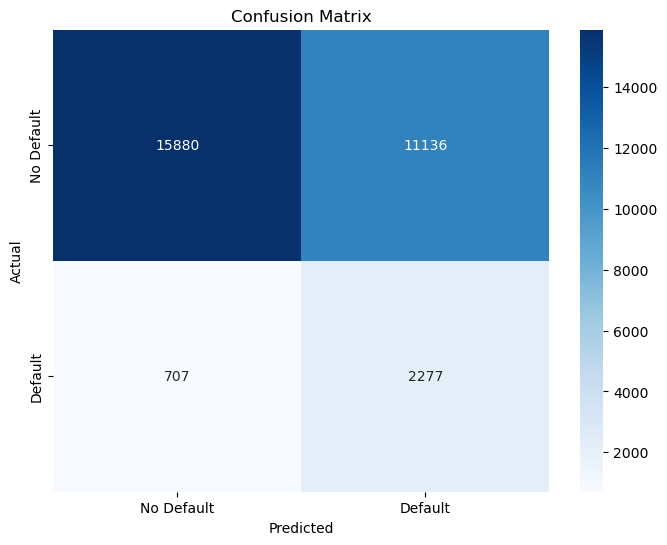

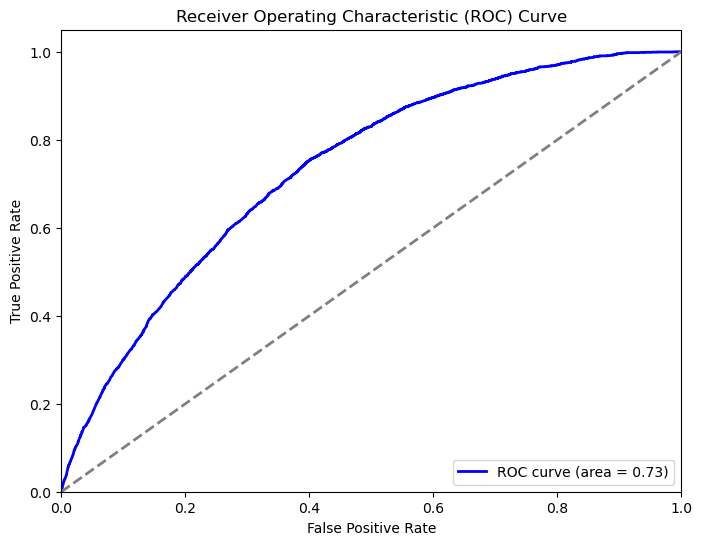

In [ ]:
# Predict the test set
y_pred_prob_xgb = xgb_model.predict(dtest)

# Convert proabilities into binary predictions
y_pred_xgb = np.where(y_pred_prob_xgb > 0.5, 1, 0)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy_xgb}")

# Balanced accuracy
balanced_acc_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
print(f"Balanced Accuracy: {balanced_acc_xgb}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix_xgb,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Default", "Default"],
    yticklabels=["No Default", "Default"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot ROC AUC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(
    fpr_xgb, tpr_xgb, color="blue", lw=2, label=f"ROC curve (area = {roc_auc_xgb:.2f})"
)
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
